In [27]:
import os
import json
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
from coefs import coefs

In [10]:
shapemode_dir = "/mnt/c/Users/trang.le/Desktop/shapemode"
fft_dir = f"{shapemode_dir}/fftcoefs"
n_coef = 128
fft_path = os.path.join(fft_dir, f"fftcoefs_{n_coef}.txt")

f = open(f"{shapemode_dir}/U-2_OS/PCA_ratio8/cells_assigned_to_pc_bins.json","r")
cells_assigned = json.load(f)
n_cells = dict()

for k,v in cells_assigned.items():
    n_cells[k] = [len(b) for b in v]

pd.DataFrame(n_cells)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,6801,18552,20635,21396,16306,17325,16735,14985,10286,17839,17248,17912
1,17739,10543,11913,12702,8825,10031,8417,8627,5889,10143,10614,11946
2,29919,16148,16914,17580,14333,16107,13886,14907,11183,15862,16267,17836
3,35955,24182,23102,23307,24166,24434,22874,24728,24766,23549,25077,24997
4,35732,34592,28734,27896,39450,34734,36651,35955,55388,33397,34956,31411
5,30715,38752,33033,30793,44395,40973,44049,42521,61378,40451,38914,34758
6,24170,32100,33069,30695,33838,33596,36655,37048,31202,34852,33560,32559
7,18316,23557,27064,27052,22089,23483,24541,25349,15421,24749,23690,25415
8,13188,16018,18930,20711,13922,15328,15245,15836,8598,16117,15656,18231
9,9292,10549,12430,13574,9085,9821,8929,9458,5251,10045,9997,11472


array(['/data/2Dshapespace/U-2_OS/cell_masks/182_H3_1_10.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/53_H7_1_2.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/254_H10_2_7.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/1773_C9_4_11.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/248_C7_1_5.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/111_C5_1_5.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/7_D9_1_2.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/1650_G12_48_13.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/1708_A3_13_32.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/551_H9_1_14.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/35_A5_1_4.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/185_G2_2_8.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/493_H2_2_12.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/1688_E6_19_13.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/47_G4_2_10.npy',
       '/data/2Dshapespace/U-2_OS/cell_masks/1823_B11_34_1

In [75]:
def get_line(file_path, search_text="", mode="first"):
    with open(file_path, "r") as F:
        lines = F.readlines()
    if mode == "first":
        for line in lines:
            if line.find(search_text) != -1 :
                return line
    elif mode == "all":
        l_results = []
        for line in lines:
            if line.find(search_text) != -1 :
                l_results += [line]
        return l_results

In [67]:
import matplotlib.pyplot as plt

pcs = list(cells_assigned.keys())
#n_bins = len(cells_assigned['PC1'])
#np.random.choice(cells_assigned['PC1'][0], 20)

def plot_example_cells(pc="PC1", cells_per_bin=5, shape_coef_path=fft_path, save_path=None):
    bin_links = cells_assigned[pc]
    plt.figure()
    fig, ax = plt.subplots(cells_per_bin, len(bin_links),sharex=True,sharey=True) # (number of random cells, number of  bin)
    for b_index, b_ in enumerate(bin_links):
        cells_ = np.random.choice(b_, cells_per_bin)
        for i, c in enumerate(cells_):
            fft_coefs = get_line(fft_path, search_text=c, mode="first")
            f_coef_c = fft_coefs.split(",")[1:n_coef*2+1]
            f_coef_c = [complex(s.replace('i', 'j')) for s in f_coef_c]
            f_coef_n = fft_coefs.split(",")[n_coef*2+1:]
            f_coef_n = [complex(s.replace('i', 'j')) for s in f_coef_n]
            ix_n, iy_n = coefs.inverse_fft(f_coef_n[0:n_coef],f_coef_n[n_coef:])
            ix_c, iy_c = coefs.inverse_fft(f_coef_c[0:n_coef],f_coef_c[n_coef:])
            ax[i, b_index].plot(ix_n.real, iy_n.real)
            ax[i, b_index].plot(ix_c.real, iy_c.real)
    if save_path != None:
        fig.savefig(f"{save_path}/{pc}_example_cells.png", bbox_inches=None)

AttributeError: 'NoneType' object has no attribute 'split'

<Figure size 432x288 with 0 Axes>

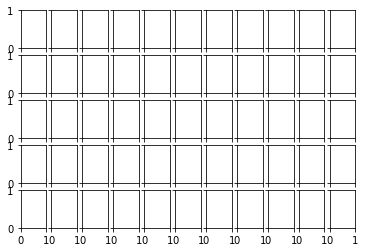

In [69]:
plot_example_cells(pc="PC1", cells_per_bin=5, shape_coef_path=fft_path, save_path=None)

In [60]:
%%timeit
fft_coefs = get_line(fft_path, search_text=c, mode="first")

30.2 s ± 8.08 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
%%timeit
fft_coefs = get_line(fft_path, search_text="/data/2Dshapespace/U-2_OS/cell_masks/1972_C11_30_4.npy", mode="first")

TypeError: argument should be integer or bytes-like object, not 'str'

In [70]:
fft_coefs

In [ ]:
#
LABEL_TO_ALIAS = {
  0: 'Nucleoplasm',
  1: 'NuclearM',
  2: 'Nucleoli',
  3: 'NucleoliFC',
  4: 'NuclearS',
  5: 'NuclearB',
  6: 'EndoplasmicR',
  7: 'GolgiA',
  8: 'IntermediateF',
  9: 'ActinF',
  10: 'Microtubules',
  11: 'MitoticS',
  12: 'Centrosome',
  13: 'PlasmaM',
  14: 'Mitochondria',
  15: 'Aggresome',
  16: 'Cytosol',
  17: 'VesiclesPCP',
  #18: 'Negative',
  #19:'Multi-Location',
}

all_locations = dict((v, k) for k,v in LABEL_TO_ALIAS.items())